# _**Output of ADE**_

_Authors: Concetta D'Amato, Niccolò Tubini and Riccardo Rigon_



License: Creative Commons 4.0

## Before starting

The **output** are stored in [NetCDF](https://en.wikipedia.org/wiki/NetCDF). [Here](https://towardsdatascience.com/handling-netcdf-files-using-xarray-for-absolute-beginners-111a8ab4463f) an introduction on how to read a NetCDF file using the python library [xarray](http://xarray.pydata.org/en/stable/). The other output are stored as csv file. 

The **outputs** are:
- Water Suction
- Water Content

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
import math
import xarray as xr
import warnings
warnings.filterwarnings('ignore')
style.available
style.use('seaborn-whitegrid')

#from GEOSPACE_Output import*
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

####### Plot settings #######
nice_fonts = {
    "legend.frameon": True, 
    "legend.fancybox": True, 
    "legend.facecolor": "white", 
    "axes.edgecolor": "0.8",
    "axes.linewidth": 0.6,
    "grid.linewidth":0.3,
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 16,
    "font.size": 16,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)

project_path = os.path.dirname(os.getcwd())

In [2]:
os.chdir(project_path+'/resources/output')
os.listdir()

['Sim_heat_diffusion_freezing_thawing_0000.nc',
 'Sim_Richards_VG_Dirichlet_new_0000.nc',
 'Check_RichardsCoupled_Romano.nc',
 'Sim_RichardsCoupled_VG_seepage_0000.nc',
 'Sim_ADE_test04_0000.nc',
 'Sim_ADE_test05_0000.nc',
 'Sim_solute_advection_dispersion_0000.nc',
 'Sim_heat_advection_diffusion_0000.nc',
 'Check_heat_advection_diffusion_0000.nc',
 'Sim_ADE_test07_0000.nc',
 'Sim_HortonRunOff_wet_0000.nc',
 'Check_Richards_VG_Dirichlet.nc',
 'Sim_ADE_test1_0000.nc',
 'Sim_RichardsCoupled_BC_0000.nc',
 'Sim_ADE_test06_0000.nc',
 'Sim_ADE_test03_0000.nc',
 'calibration_Theta_VG.csv',
 'calibration_Psi_VG.csv',
 'Sim_RichardsCoupled_VG_0000.nc',
 'Sim_RichardsCoupled_Romano_0000.nc',
 'Check_RichardsCoupled_Kosugi.nc',
 'Check_heat_diffusion_freezing_thawing_0000.nc',
 'Sim_ADE_test02_0000.nc',
 'Check_heat_diffusion_0000.nc',
 'Sim_RichardsCoupled_Kosugi_0000.nc',
 'Check_RichardsCoupled_VG.nc',
 'Check_RichardsCoupled_BC.nc',
 'Sim_RichardsCoupled_VG_calibration_0000.nc']

In [67]:
file_name = 'Sim_ADE_test07_0000.nc'

In [68]:
ds = xr.open_dataset(file_name,engine='scipy')
ds

<xarray.Dataset>
Dimensions:                                (depth: 6, dualDepth: 6, time: 746)
Coordinates:
  * depth                                  (depth) float64 -0.45 -0.35 ... 0.0
  * dualDepth                              (dualDepth) float64 -0.5 -0.4 ... 0.0
  * time                                   (time) datetime64[ns] 2003-01-01 ....
Data variables: (12/18)
    psiIC                                  (depth) float64 ...
    psi                                    (time, depth) float64 ...
    rootIC                                 (depth) float64 ...
    theta                                  (time, depth) float64 ...
    waterVolume                            (time, depth) float64 ...
    darcyVelocity                          (time, dualDepth) float64 ...
    ...                                     ...
    soluteFluxes                           (time, dualDepth) float64 ...
    dispersionSoluteFluxes                 (time, dualDepth) float64 ...
    advectionSoluteFluxes                  (time, dualDepth) float64 ...
    errorWaterVolumeConcentration          (time) float64 ...
    errorVolume                            (time) float64 ...
    controlVolume                          (depth) float64 ...
Attributes: (12/15)
    Description_of_the_problem:                            \nRichards' equati...
    Top_boundary_condition_for_solute_equation:            
    Bottom_boundary_condition_for_solute_equation:         
    Top_boundary_condition_for_Richards_equation:          
    Bottom_boundary_condition_for_Richards_equation:       
    path_top_boundary_condition_for_solute_equation:       
    ...                                                    ...
    path_grid:                                             resources/input/Gr...
    time_delta:                                             
    swrc_model:                                            VG
    soil_hydraulic_conductivity_model:                     Mualem VG no tempe...
    interface_hydraulic_conductivity_model:                max
    interface_dispersion_coefficient_model:                max

## Plot water suction $\psi$

 ### Intial condition for water suction $\psi$

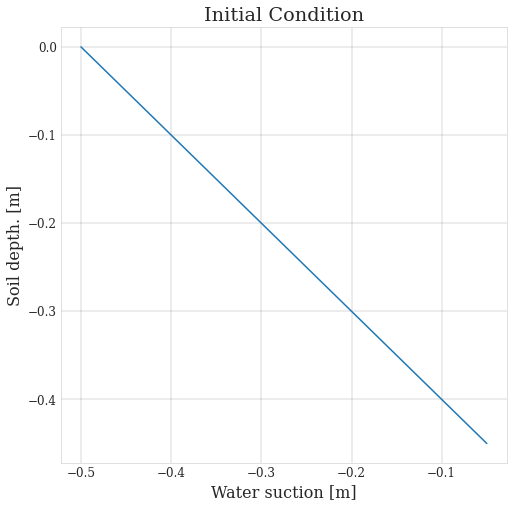

In [69]:
fig = plt.figure(figsize=(8,13/1.62))
ds.psiIC.plot(y='depth')
plt.xlabel('Water suction [m]')
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

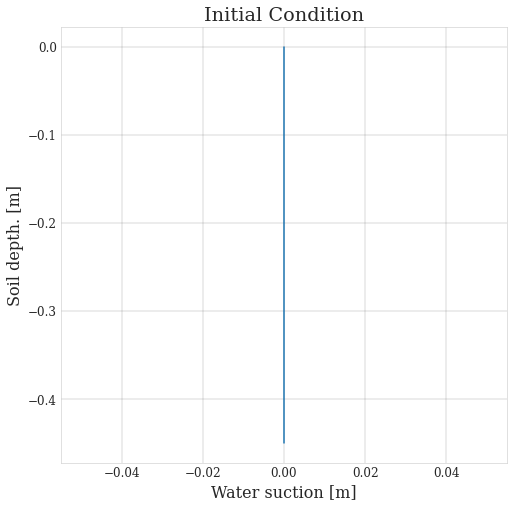

In [70]:
fig = plt.figure(figsize=(8,13/1.62))
ds.concentrationIC.plot(y='depth')
plt.xlabel('Water suction [m]')
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

 ### Water suction $\psi$ among the soil depth in your simulation  

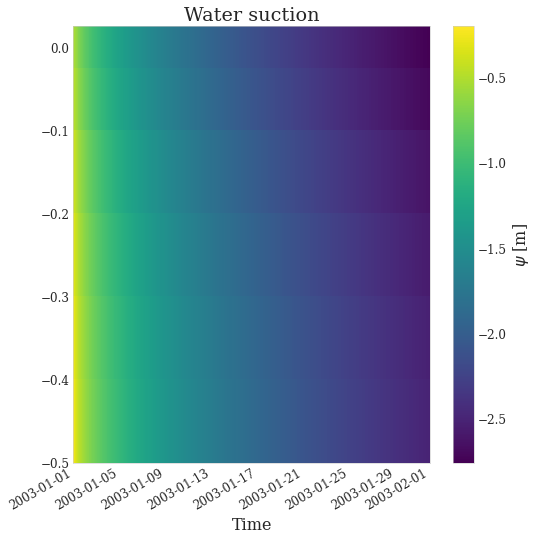

In [71]:
fig = plt.figure(figsize=(8,13/1.62))
ax = ds.psi.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water suction')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\psi$ [m]')

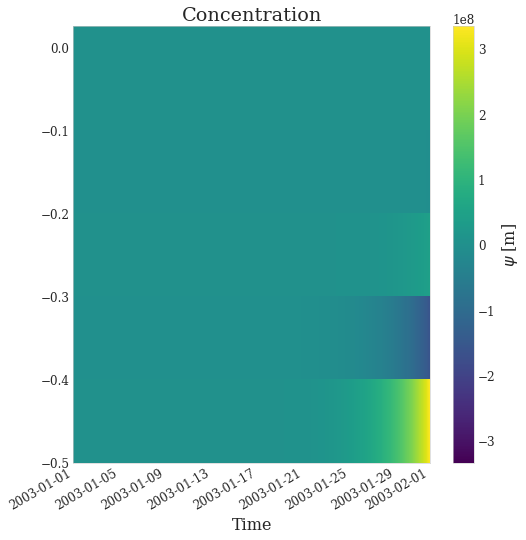

In [73]:
fig = plt.figure(figsize=(8,13/1.62))
ax = ds.concentrations.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Concentration')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\psi$ [m]')


<br>

## Plot water content  $\theta$

Set the number of control volumes of your domain and the root depth 

In [74]:
root_depth = -0.7
evaporation_layer_depth = -0.5

 ### Water content $\theta$ among the soil depth in your simulation  

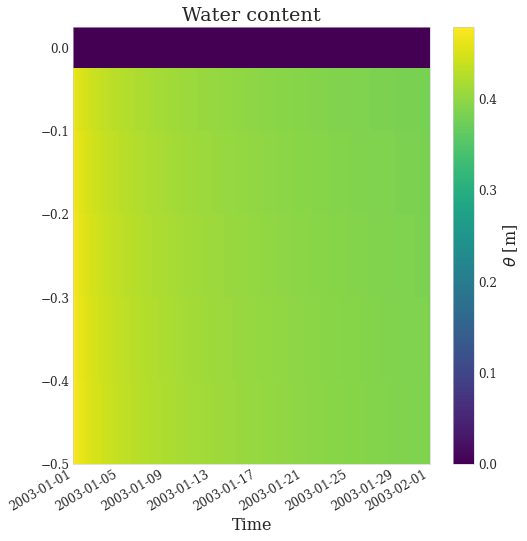

In [75]:
fig = plt.figure(figsize=(8,13/1.618))
ax = ds.theta.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water content')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\\theta$ [m]')


### Plot specifical depth

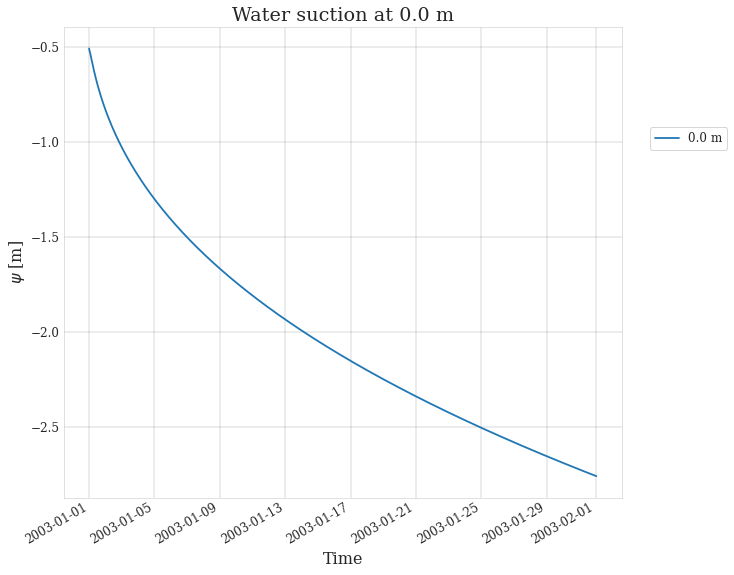

In [76]:
fig = plt.figure(figsize=(10,14/1.618))
ds.psi.sel(depth=ds.depth.values[len(ds.depth)-1], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(ds.depth.values[len(ds.depth)-1])+' m')
plt.ylabel('$\psi$ [m]')
plt.xlabel('Time')
plt.title('Water suction at 0.0 m')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

Define a vector of depth 'myDepth' you would plot 

In [77]:
myDepth = [-0.15,-0.30,-0.45]

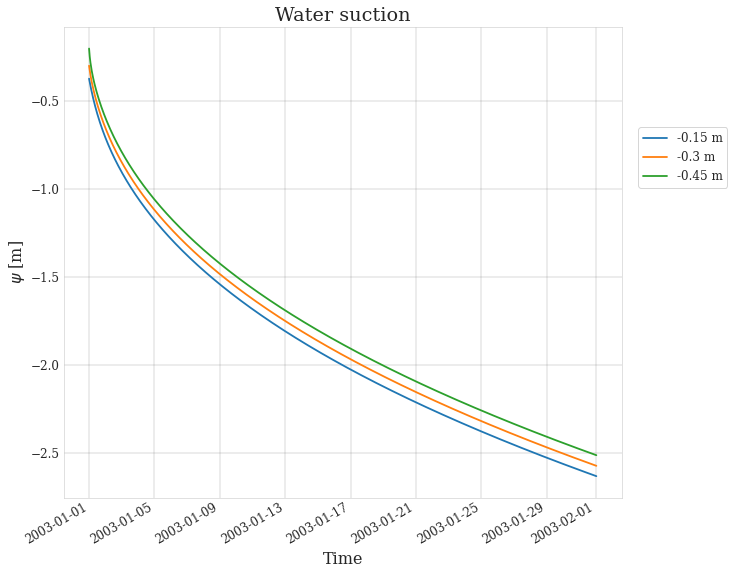

In [78]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.psi.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\psi$ [m]')
plt.xlabel('Time')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

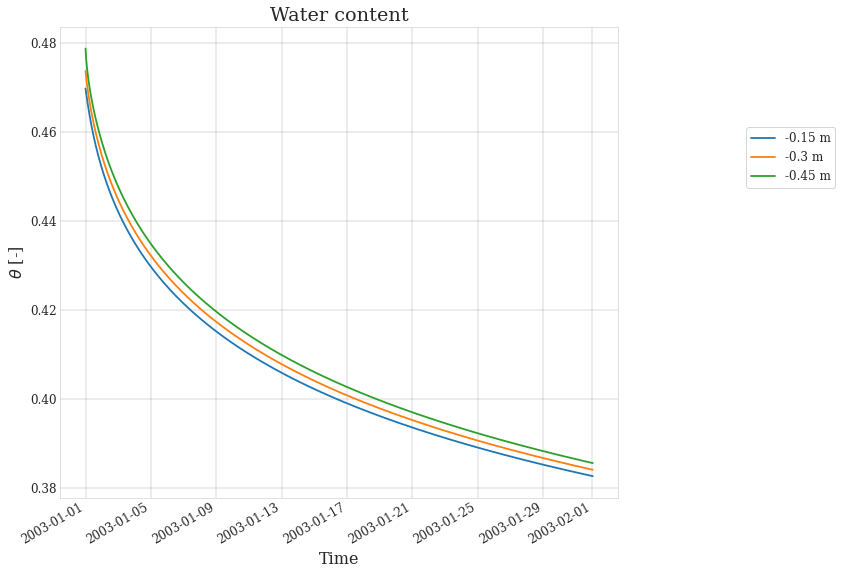

In [79]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.theta.where(ds.depth<0).sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\\theta$ [-]')
plt.xlabel('Time')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

### Plot specifical date
Define a vector of date 'myDate' you would plot 

In [95]:
myDate = ['2003-01-01 01:00','2003-01-04 01:00']#,'2003-01-07 01:00']#,'2003-01-10 01:00'] #'2003-01-12 01:00', '2003-01-15 00:00,'2003-07-01 01:00','2003-08-04 01:00','2003-09-07 01:00','2003-10-10 01:00', '2003-11-12 01:00', '2003-12-15 00:00']

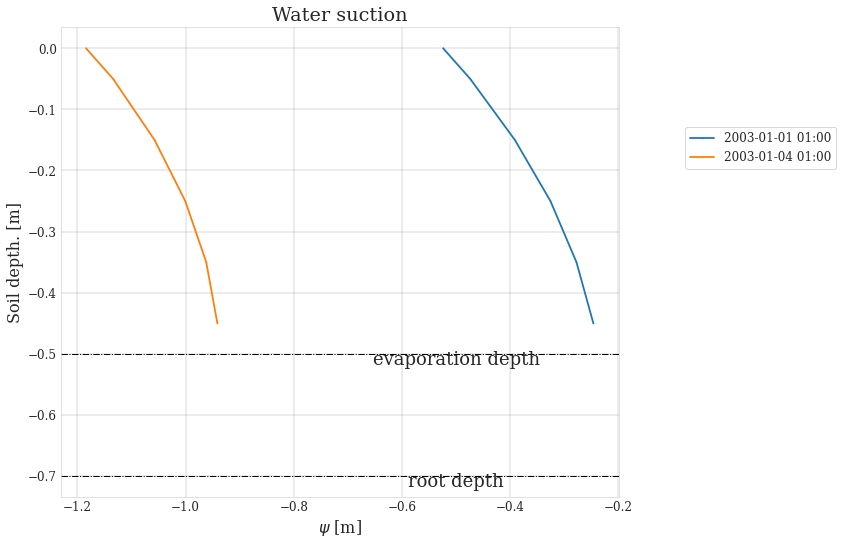

In [96]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.psi.sel(time=myDate[i]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\psi$ [m]')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.axhline(y=root_depth, xmin=0, xmax=1,color='black',linewidth=1, linestyle='-.')
plt.text(-0.5, root_depth-0.010, 'root depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
plt.axhline(y=evaporation_layer_depth, xmin=0, xmax=1,color='black',linewidth=1,linestyle='-.')
plt.text(-0.5, evaporation_layer_depth-0.010, 'evaporation depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
plt.grid(color='grey', linestyle='-', linewidth=0.3)
#save figure
#plt.savefig('WaterSuction.png', dpi=300, bbox_inches = "tight")

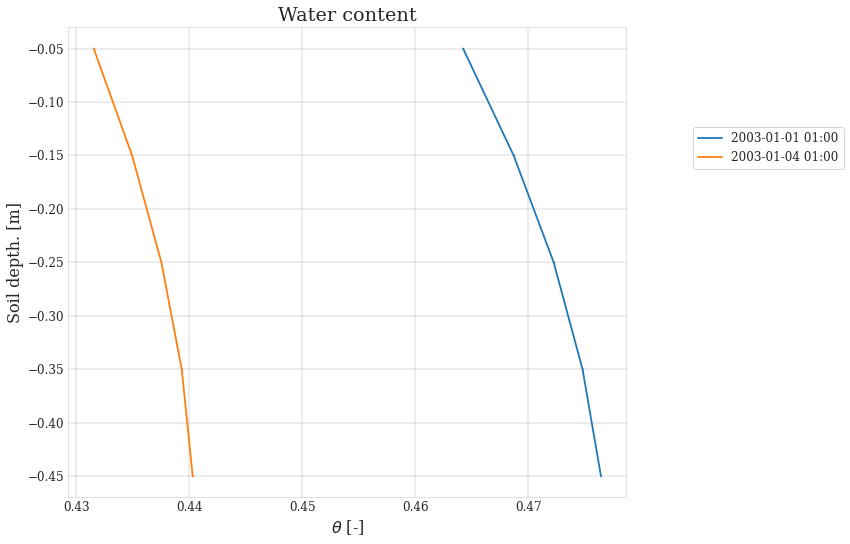

In [97]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.theta.sel(time=myDate[i],depth=ds.depth.values[0:len(ds.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\theta$ [-]')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
#plt.axhline(y=root_depth, xmin=0, xmax=1,color='black',linewidth=1, linestyle='-.')
#plt.text(0.25, root_depth-0.010, 'root depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
#plt.axhline(y=evaporation_layer_depth, xmin=0, xmax=1,color='black',linewidth=1,linestyle='-.')
#plt.text(0.25, evaporation_layer_depth-0.010, 'evaporation depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
plt.grid(color='grey', linestyle='-', linewidth=0.3)
#save figure
#plt.savefig('WaterContent1_5.png', dpi=300, bbox_inches = "tight")

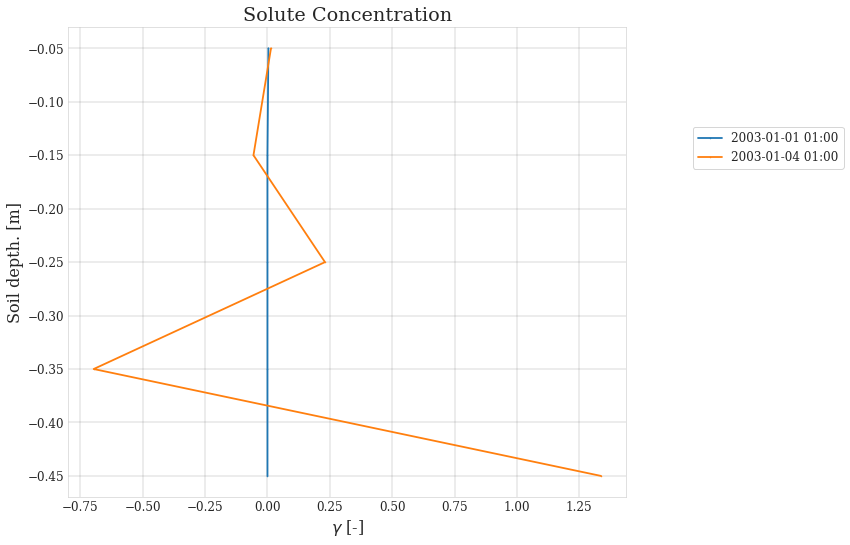

In [98]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.concentrations.sel(time=myDate[i],depth=ds.depth.values[0:len(ds.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\gamma $ [-]')
plt.title('Solute Concentration')
plt.legend(bbox_to_anchor=(1.4,0.8))
#plt.axhline(y=root_depth, xmin=0, xmax=1,color='black',linewidth=1, linestyle='-.')
#plt.text(0.25, root_depth-0.010, 'root depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
#plt.axhline(y=evaporation_layer_depth, xmin=0, xmax=1,color='black',linewidth=1,linestyle='-.')
#plt.text(0.25, evaporation_layer_depth-0.010, 'evaporation depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
plt.grid(color='grey', linestyle='-', linewidth=0.3)
#save figure
#plt.savefig('WaterContent1_5.png', dpi=300, bbox_inches = "tight")

In [99]:
ds.concentrations.values

array([[ 3.32001376e-12,  1.83835517e-10,  2.05869395e-08,
         5.33976856e-06,  3.59610310e-03,  3.59610310e-03],
       [ 1.38331357e-07, -1.52143691e-07,  1.08741701e-06,
        -2.98366656e-05,  3.63399649e-03,  3.63399649e-03],
       [ 3.36954873e-07, -5.92331838e-07,  4.69626454e-06,
        -8.71922227e-05,  3.69270023e-03,  3.69270023e-03],
       ...,
       [ 3.25834186e+08, -1.57027505e+08,  4.16734614e+07,
        -5.64866870e+06,  2.45905970e+05,  2.45905970e+05],
       [ 3.29907406e+08, -1.58983455e+08,  4.21885487e+07,
        -5.71735187e+06,  2.48725638e+05,  2.48725638e+05],
       [ 3.34025946e+08, -1.60961069e+08,  4.27092859e+07,
        -5.78677279e+06,  2.51573280e+05,  2.51573280e+05]])

## Plot top-bottom flux 

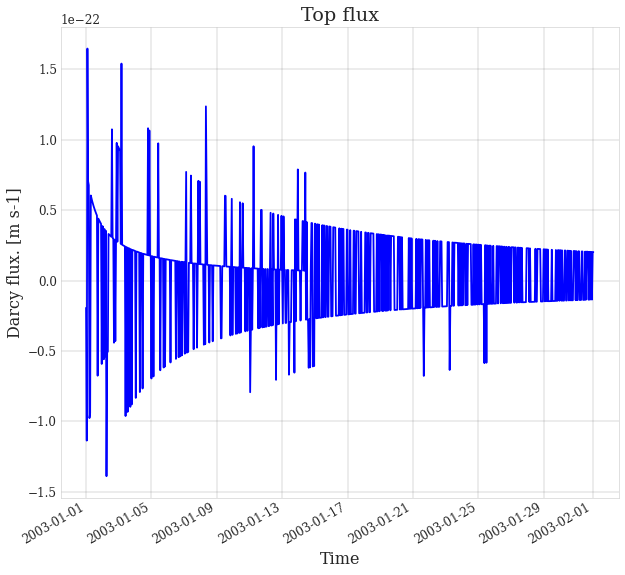

In [100]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[len(ds.dualDepth)-1], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Top flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

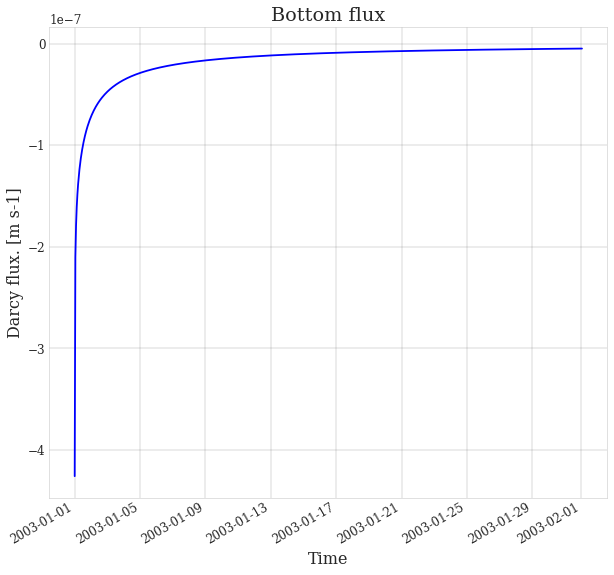

In [101]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[0], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Bottom flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

In [102]:
fig = plt.figure(figsize=(10,14/1.618))
ds.runOff.plot(linewidth=1.8,color='blue')
plt.title('Runoff')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

AttributeError: 'Dataset' object has no attribute 'runOff'

<Figure size 720x622.991 with 0 Axes>

## Plot Error 

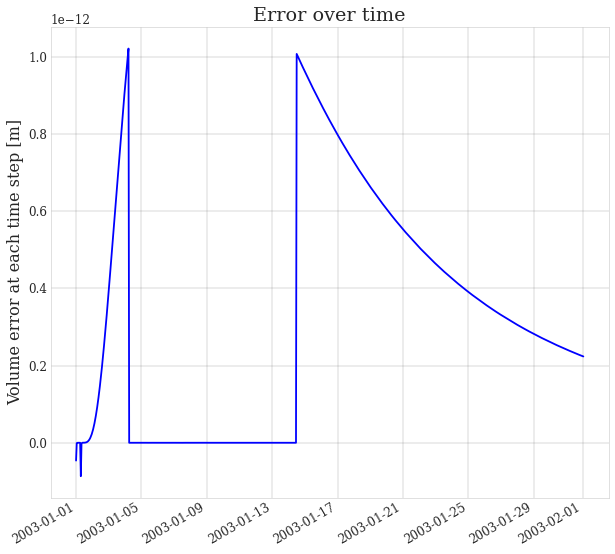

In [103]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds.errorVolume.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

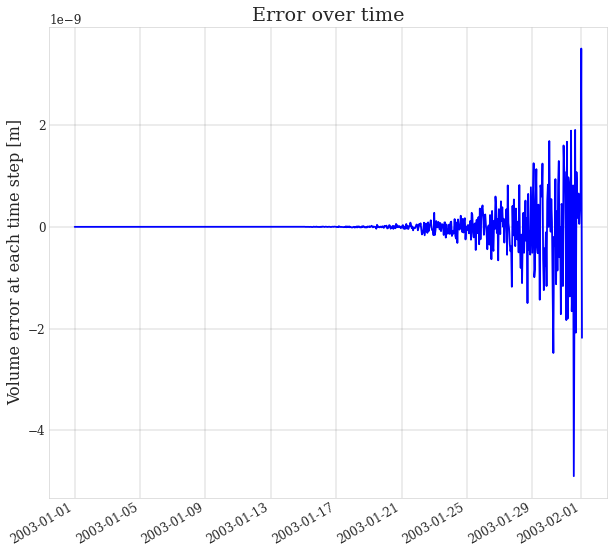

In [89]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds.errorWaterVolumeConcentration.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

<br>

In [40]:
df = pd.read_csv('Transpiration_PR_waterstress__test.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','T-Prospero [mm]']

fig = px.line(df, x='Datetime', y='T-Prospero [mm]', title='Time Series Transpiration')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Transpiration_PR_waterstress__test.csv'

In [ ]:
#df2 = pd.read_csv('LongDownwelling_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
#df2.columns = ['Datetime','Sap_flow_Transpiration']

#fig = px.line(df2, x='Datetime', y='Sap_flow_Transpiration', title='Time Series Transpiration')
#fig.update_xaxes(rangeslider_visible=True)
#fig.show()

In [ ]:
#fig = px.line()
#fig.add_trace(go.Scatter(x=df['Datetime'], y=df['T-Prospero [mm]'], mode='lines', name='mod'))
#fig.add_trace(go.Scatter(x=df['Datetime'], y=df2['Sap_flow_Transpiration'], mode='lines', name='obs'))


#fig.update_layout(title= 'Transpiration')
#fig.show()